## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

In [53]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [409]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [34]:
s_data.shape

(25, 2)

In [332]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

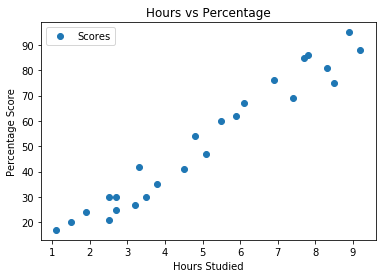

In [404]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [14]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [415]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 

# ALGO 01 :  Linear Regression : 


### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [416]:
from sklearn.linear_model import LinearRegression  
model1 = LinearRegression()  
model1.fit(X_train, y_train) 

y_pred1 = model1.predict(X_test)


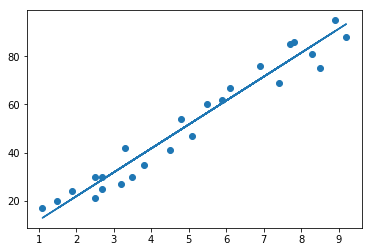

In [417]:
# Plotting the regression line
line1 = model1.coef_*X+model1.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line1);
plt.show()

## RMSE : 

In [418]:
mean_squared_error(y_test, y_pred1, squared=False)

4.5092043283688055

# ALGO 02 : Lasso 

In [419]:
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV

lasso = Lasso()


parameters = {'alpha' : [1e-15, 1e-10, 1e-05, 1, 10, 15, 2]}
model2 = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

model2.fit(X_train, y_train)

print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 1}
-37.90737586862605


C:\Users\Soheib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.38984878587112, tolerance: 0.8464857142857144
  positive)
C:\Users\Soheib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151.92476782174796, tolerance: 0.8430857142857143
  positive)
C:\Users\Soheib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189.5461121835647, tolerance: 0.9391714285714284
  positive)
C:\Users\Soheib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

In [420]:
#print(X_test) # Testing data - In Hours
y_pred2 = model2.predict(X_test) # Predicting the scores

## RMSE : 

In [421]:
mean_squared_error(y_test, y_pred2, squared=False)

4.50920318179457

# ALGO 03 : Gradient Boosting regressor 

In [423]:
params = {'n_estimators': 500,
          'max_depth': 25,
          'n_estimators': 25,
          'min_samples_split': 10,
          'learning_rate': 0.1,
          'loss': 'ls'}

In [424]:
from sklearn import ensemble 
model3 = ensemble.GradientBoostingRegressor(**params)
model3.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=25,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=25,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## RMSE : 

In [425]:
#print(X_test) # Testing data - In Hours
y_pred3 = model3.predict(X_test) # Predicting the scores
mean_squared_error(y_test, y_pred3, squared=False)


6.587042333052891

## Algo 04: Logistic Regression 

In [426]:
from sklearn.linear_model import LogisticRegression  
model4 = LogisticRegression(

)  
model4.fit(X_train, y_train) 


C:\Users\Soheib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## RMSE : 

In [427]:
#print(X_test) # Testing data - In Hours
y_pred4 = regressor2.predict(X_test) # Predicting the scores
mean_squared_error(y_test, y_pred4, squared=False)


7.492853738253347


# ALGO 05 : Ridge 

In [446]:
from sklearn.linear_model import Ridge

ridge = Ridge()

parameters = {'alpha' : [ 10, 15, 20, 30]}
model5 = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

model5.fit(X_train, y_train)

print(model5.best_params_)
print(model5.best_score_)

model5.fit(X_train, y_train)

{'alpha': 10}
-46.735080243320176


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [10, 15, 20, 30]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [447]:
#print(X_test) # Testing data - In Hours
y_pred5 = model5.predict(X_test) # Predicting the scores
mean_squared_error(y_test, y_pred5, squared=False)


4.4817062539426065

## Plotting predicted vs real values 

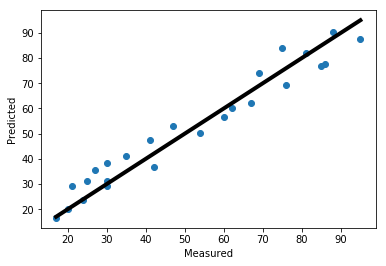

In [450]:
y_hat5 = model5.predict(X)

fig, ax = plt.subplots()
ax.scatter(y, y_hat5)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# ALGO 06:  ElasticNetCV

In [451]:
from sklearn.linear_model import ElasticNetCV
model6 = ElasticNetCV(
    
    l1_ratio = 0.125,
    

)
model6.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.125, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

## RMSE :

In [452]:
#print(X_test) # Testing data - In Hours
y_pred6 = model6.predict(X_test) # Predicting the scores
mean_squared_error(y_test, y_pred6, squared=False)


4.393156646866377

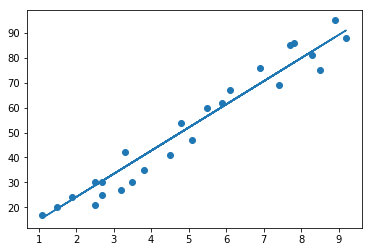

In [453]:
# Plotting the regression line
line6 = model6.coef_*X+model6.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line6);
plt.show()

## Plotting predicted vs real values 

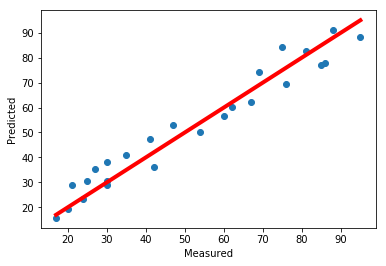

In [454]:
y_hat6 = model6.predict(X)

fig, ax = plt.subplots()
ax.scatter(y, y_hat6)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [455]:
alphas = np.linspace(0, 1, 1001)

RMSE1 = np.array([np.sqrt(mean_squared_error(y_test, (alpha)*y_pred2 + (1-alpha)*y_pred5 )) for alpha in alphas])
best_alpha = alphas[RMSE1.argmin()]
RMSE = RMSE1.min()

print('Best alpha: %f; Corresponding RMSE score on test: %f' % (best_alpha, RMSE))
#4.37518

Best alpha: 0.475000; Corresponding RMSE score on test: 4.354329


### **Making Predictions**
Now that we have trained our algorithms and calculated thier RMSE , it's time to make some predictions with the best algrithmor the best two algorithms and i tried an ensembling between the second one and fivth one : 

In [456]:
alphas = np.linspace(0, 1, 1001)

RMSE1 = np.array([np.sqrt(mean_squared_error(y_test, (alpha)*y_pred2 + (1-alpha)*y_pred5 )) for alpha in alphas])
best_alpha = alphas[RMSE1.argmin()]
RMSE = RMSE1.min()

print('Best alpha: %f; Corresponding RMSE score on test: %f' % (best_alpha, RMSE))
#4.37518

Best alpha: 0.475000; Corresponding RMSE score on test: 4.354329


## Predicting all Scores : 

In [458]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': (best_alpha)*y_pred2 + (1-best_alpha)*y_pred5 })  
df 

,Actual,Predicted
0,20,18.600551
1,27,34.756212
2,69,74.670197
3,30,28.103881
4,62,60.415202
5,35,40.458210
6,24,22.401883


In [411]:
# You can also test with your own data
hours = np.array([[9.25]])

own_pred1 = model2.predict(hours)
own_pred2 = model5.predict(hours)

own_pred = own_pred1 * best_alpha + own_pred2 * ( 1 - best_alpha)

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 91.15834724307463


### with the 5th algorithm alone I got : 

In [459]:
# Comparing Actual vs Predicted
df5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred5 })  
df5 

,Actual,Predicted
0,20,20.189152
1,27,35.670594
2,69,73.918862
3,30,29.295882
4,62,60.258766
5,35,41.134632
6,24,23.831844


In [460]:
# You can also test with your own data
hours = np.array([[9.25]])

own_pred5 = model5.predict(hours)


print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred5[0]))

No of Hours = [[9.25]]
Predicted Score = 90.76631284264553
